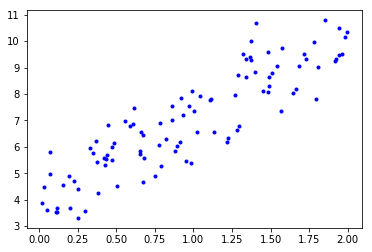

In [62]:
#무작위 생성 데이터 셋
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
plt.plot(x,y,"b.")
plt.show()


In [63]:
#정규방정식을 이용한 계산
x_b = np.c_ [np.ones((100,1)), x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta

array([[4.04683119],
       [3.0428077 ]])

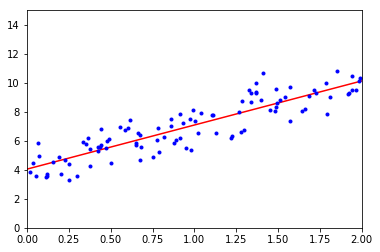

In [64]:
#계산한 theta를 이용해 임의의 x에 대한 y값 예측
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta)
y_predict

plt.plot(x_new, y_predict, "r-") #선
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [65]:
#사이킷런 코드
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04683119]), array([[3.0428077]]))

In [66]:
lin_reg.predict(x_new)

array([[ 4.04683119],
       [10.13244659]])

In [67]:
#batch gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta) - y)
    theta = theta -eta*gradients
print(theta)    

[[4.04683119]
 [3.0428077 ]]


In [71]:
#SGD

n_epochs = 50 
t0,t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t): #learning rate를 고정하지 않고 epoch과 step에 따라서 점점 작아지도록 했음.
    return t0/(t+t1)

theta = np.random.randn(2,1) #randominitialization

for epoch in range(n_epochs):
    for i in range(m): 
        random_index = np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
theta

array([[4.05421243],
       [3.00251608]])

In [73]:
#사이킷런을 사용한 SGD
from sklearn.linear_model	import	SGDRegressor 
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1) 
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_ 

(array([4.06151134]), array([3.04879109]))

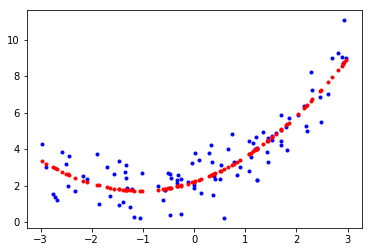

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
m= 100 
X=6*np.random.rand(m,1)-3 
y=0.5*X**2+X+2+np.random.randn(m,1)



poly_features=PolynomialFeatures(degree=2,include_bias=False) 
X_poly=poly_features.fit_transform(X) 

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ ,lin_reg.coef_



plt.plot(X,y,"b.")
plt.plot(X,lin_reg.predict(X_poly), "r.")
plt.show()